# **Assignment #1- (Diego Hincapie-Ossa).**

# **Problem 1. Performance of a flexible (more complex) statistical learning method.**
We must start from the concept of the bias-variance trade-off.  In general, the relationship between flexibility of a statistical learning technique and its generalised quality of fit (error on unseen data) is described by a U-shape function on the error. This shape is the natural form from the competing effects of bias and variance. Bias is an introduced error that can be corrected by adding complexity to the model; on the other hand, variance will increase with the number of degrees of freedom and with the model’s ability to capture random noise (representing how variable the model would be if inferred from a different training data set). The selection of the model depends on each particular dataset.

**(a) The sample size n is extremely large, and the number of predictors p is small.**
We can say that under this scenario, a complex method would outperform an inflexible one **if the real function of the data corresponds to a similar level of complexity than our model.** There is a limit when adding complexity to our model stops improving its performance.

Considering the bias-variance trade-off, and without previous knowledge of the nature of the dataset, we can’t be sure a priori what is the optimal level of complexity we should use in our model. In this particular case, small “p” implies that we must capture few effects on the response (few features and reduced room for interaction effects). Also, large “n” enables us to have large testing datasets. This does not necessarily mean that in datasets with small “p/n” a more complex model is inevitably superior; this does mean that we have room to test the variance effect of higher complexity models.
Since less flexible models are better in terms of interpretability and computational efficiency (for example), it is still convenient to start from a non-flexible model. In this particular case, if we have large sample size (n) and small predictor dimensions (p), we can add complexity as needed and test until we detect a “valley” in the error (as a function of flexibility) curve. 




**(b) The number of predictors p is extremely large, and the number of observations n is small.** In high-dimensional models, the effect of a large number of features (p) must be captured simultaneously. A complex model will overfit the data if the number of observations (n) is not large enough to allow for comprehensive testing. Therefore, in extremely large p/n, an inflexible method is expected to outperform a complex one since it will prevent overfitting.  

**(c) The relationship between the predictors and response is highly non- linear.**  It is expected that flexible models have better performance because a rigid model will have a high inherent bias. Lower flexibility models will not be able to capture the complexity of non-linearities.

**(d)	The variance of the error terms, i.e.  2 = var( ), is extremely high.**
A complex model will overfit the model because it is more susceptible to capture the inherent noise. Therefore, a less flexible model is expected to perform better.

# **Problem 2. Linear Regression.**

We generated 200 samples from a normally distributed function with mean = 5 and standard deviation = 2. 
We simulate the response from a linear function (intercept= 1, slope =1.5) with normally distrubuted noise (mean = 0, std=2)

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
n=200
X = np.array([np.random.normal(5,2 ,n)])
print(type(X),X.shape)
epsi=np.array([np.random.normal(0,2,n)])
Y=1+1.5*X+epsi
print(type(Y),Y.shape)

<class 'numpy.ndarray'> (1, 200)
<class 'numpy.ndarray'> (1, 200)


**(a) Scatter plot of data and true regression line**. The blue line represents the true linear function (without noise).

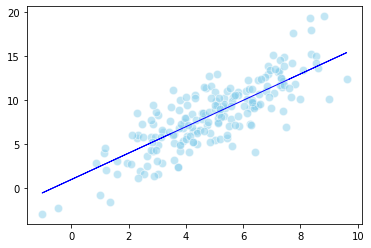

In [82]:
Yreal=1+1.5*X
# print(Yreal)
# print(X)

plt.scatter(X, Y, c='skyblue', edgecolor='white', s=70,alpha=0.5)
plt.plot(X[0],Yreal[0], color = "blue", lw=1)

**(b) Regression with GD model**. The following plot illustrates the data, the true regression and the Linear estimation based on the Gradient Descent model.
It is important to mention that, in order for the GD model to be comparable with the real data and the real Linear Model, the scalation (based on the mean and standard deviation of the X-predictor and Y-response data) was reversed. A re-scalation was applied to the coefficients obtained by the GD model; we multiplied the standarised X and the (standardised) predicted Y by their respective standard deviation and added their respective mean. In that way, we can make a fair comparison.
**(b).(a) Why are they not the same?**  The GD model is an estimation (that holds an underlying optimisation problem) based on a model that trained from the data that we had available; this is, the random sample that we collected in the X array. Since the GD model was constructed based on X, it inevitably captures the noise that these data have. Therefore, the GD model can't be exactly the same as the real Linear Regression.


(200, 1) (200,)
1.9248852943731 3.793021754623019
4.938594402415824 8.34338148874564


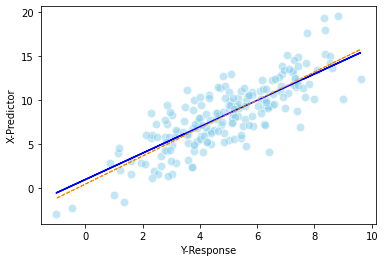

In [83]:
## Code from class with minor adaptations##
class LinearRegressionGD(object):

    def __init__(self, eta=0.001, n_iter=20):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])  #As a convention, we append an underscore (_) to attributes that are not being created
                                                #upon the initialization of the object but by calling the object's other methods.
        self.cost_ = []
        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return self.net_input(X)
X =X.reshape(n,1)


# print(Y)
y = Y[0]
print(X.shape,y.shape)
# print(y)
from sklearn.preprocessing import StandardScaler

##Record stdv and mean for X and Y
stdvX=np.std(X)
stdvY=np.std(y)
print (stdvX,stdvY)
meanX=np.mean(X)
meanY=np.mean(y)
print (meanX,meanY)

sc_x = StandardScaler() #instanciate the class
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y[:, np.newaxis]).flatten() #create a column vector, standarse, then (falatten) put back as an array.
lr = LinearRegressionGD() #instaniate the class
lr.fit(X_std, y_std)




# sns.reset_orig() # resets matplotlib style
# # plt.plot(range(1, lr.n_iter+1), lr.cost_)
# # plt.ylabel('SSE')
# # plt.xlabel('Iteration')
# # plt.show()


########
##We perform the re-sizing of the arrays in this function in order to display the corresponding data in non-standardised form.
def lin_regplot(X, y, model):
    # plt.scatter(X, y, c='steelblue', edgecolor='white', s=70) #### Do Not to plot the data again
    plt.plot(X*stdvX+meanX, model.predict(X)*stdvY+meanY, color='darkorange', lw=1, linestyle='--')   

    return None

Yreal=1+1.5*X  # Necessary to match dimensions again
# print(Yreal)
# print(X)
plt.scatter(X, Y, c='skyblue', edgecolor='white', s=70,alpha=0.5)
plt.plot(X,Yreal, color = "blue" )
plt.xlabel('Y-Response')
plt.ylabel('X-Predictor')

lin_regplot(X_std, y_std, lr)

plt.show()

# **Problem 3. Diabetes Dataset.**

**(a)** The following is the dataframe created from the Diabetes dataset.

In [84]:
df = pd.read_csv('https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt',sep='\s+')
print(df.columns)
print(df.head())
# 
Pred=df.drop(["Y"],axis=1)
Resp=df.Y

print(Pred.shape,Resp.shape)
# print(Resp)

Index(['AGE', 'SEX', 'BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'Y'], dtype='object')
   AGE  SEX   BMI     BP   S1     S2    S3   S4      S5  S6    Y
0   59    2  32.1  101.0  157   93.2  38.0  4.0  4.8598  87  151
1   48    1  21.6   87.0  183  103.2  70.0  3.0  3.8918  69   75
2   72    2  30.5   93.0  156   93.6  41.0  4.0  4.6728  85  141
3   24    1  25.3   84.0  198  131.4  40.0  5.0  4.8903  89  206
4   50    1  23.0  101.0  192  125.4  52.0  4.0  4.2905  80  135
(442, 10) (442,)


**(b)** Data spilit: 80% training and 20% testing data. 

In [85]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Pred, Resp, test_size=0.2, random_state=13)
print(X_train.shape,y_train.shape)



(353, 10) (353,)


**(c) Linear model from sklearn.** We plotted the measured data (response from the testing dataset) versus the predicted data from the sklearn linear regression. Even though the pattern shows an apparent positive correlation around the x=y diagonal (a perfect model would lead to all points to fall on the diagonal) , we need to provide additional metrics and further illustration to analyse the goodness of fit of the prediction. 
The second plot shows the predicted and measured responses as a function of one of the features (BMI). The modelled data seem not to reproduce some of the outliers found in the real data.
Finally, we calculated the Adjusted R2 to acknowledge the number of features and number of data (based on the R2 reported by sklearn) and the mean root squared error (RMS). The AdjR2 is below 15% which reflects a poor goodness of fit while the RMS of 56 units correspond to 20% of the range of the 'y' data.

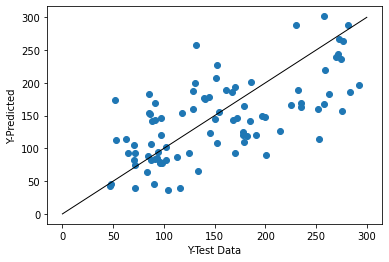

Adjusted R2: 0.14610778338977282
RMSError: 55.71540522899782


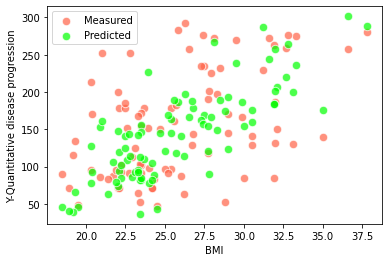

In [86]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error


LinRegr = LinearRegression().fit(X_train, y_train)
Coefficients=LinRegr.coef_
Intercept=LinRegr.intercept_

Prediction=X_test.dot(Coefficients)+Intercept
plt.scatter(y_test, Prediction)
plt.plot([0,300],[0,300], color = "black", lw=1)
plt.xlabel('Y-Test Data')
plt.ylabel('Y-Predicted')
plt.show()
plt.scatter(X_test["BMI"], y_test, c='tomato', edgecolor='white', s=70,alpha=0.7,label='Measured')
plt.scatter(X_test["BMI"], Prediction, c='lime', edgecolor='white', s=70,alpha=0.7,label='Predicted')
plt.xlabel('BMI')
plt.ylabel('Y-Quantitative disease progression')
plt.legend()

R2=r2_score(Prediction,y_test)
n=len(X_train)
p=10
Adj_r2 = 1-(1-R2)*(n-1)/(n-p-1)

RMS=mean_squared_error(Prediction, y_test,squared=False)

print("Adjusted R2:",Adj_r2)
print("RMSError:",RMS)




**(d) The 5-fold Cross validation. *What is its purpose and how is it performed*?** in general, the *k-fold cross-validation*, or any other form of cross validation is executed to evaluate how effective an algorithm is. In the k-fold cross validation, we randomly divide the data into "k" groups. We separate on group (1/k of the data) for testing and train the algorithm in the other (k-1)/k. We repeat the procedure until all the groups are used as the testing set (k times) and average the *k* results.

In [87]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(LinRegr, Pred, Resp, cv=5)
print("The results from the 5-fold validation runs are: ",score)
print("The cross validation result (the average) is: ",np.mean(score))


The results from the 5-fold validation runs are:  [0.42955615 0.52259939 0.48268054 0.42649776 0.55024834]
The cross validation result (the average) is:  0.4823164359086419


In our case, when we evaluate our algorithm using 5-fold cross validation of our dataset, we obtain resulting scores around 0.5.

# **Problem 4. Regularisation techniques.**

**i. Data pre-processing:** 
**a.** We import the data into a dataframe. 
**b.** Then create additional columns for each possible categorical value in the "month" and "day" columns. We fill the rows with binary values according to the month and day in the data.  In total we add 12 + 7 = 19 columns of "zeros" and "ones".
**c.** We eliminate the original categorical columns that contained with "string" values and whose information we recorded in the binary-value columns for months and days.
**d.** Finally, we separate the predictors and the response.

In [88]:
#"a."
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv',sep=',')
print(df.head(2))
#"b."
months=["jan","feb","mar","apr","may","jun","jul","aug","sep","oct","nov","dec"]
days=["mon","tue","wed","thu","fri","sat","sun"]

i=0
for day in days:
  dayarray=np.zeros(len(df))
  df[day]=pd.DataFrame(dayarray, columns = [day])
  df[day] = [1 if ele  == day else 0 for ele in df["day"]]
  i+=1
i=0
# print(df["fri"])

for month in months:
  montharray=np.zeros(len(df))
  df[month]=pd.DataFrame(dayarray, columns = [day])
  df[month] = [1 if ele  == month else 0 for ele in df["month"]]
  i+=1
# "c."
df=df.drop(["month","day"],axis=1)
# "d."
PredFire=df.drop(["area"],axis=1)
RespFire=df.area
print(df.columns)
print(PredFire.shape,RespFire.shape)


   X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
Index(['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain',
       'area', 'mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun', 'jan', 'feb',
       'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'],
      dtype='object')
(517, 29) (517,)


**Linear Regression:** We started by training a linear regression and executing a 5-fold cross validation for our reference.

In [89]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(PredFire, RespFire, test_size=0.2, random_state=17)
print(X_train2.shape,y_train2.shape)

LinRegr2 = LinearRegression().fit(X_train2, y_train2)
LRCoef2=LinRegr.coef_
Interc2=LinRegr.intercept_

scoreLR = cross_val_score(LinRegr2, PredFire, RespFire, cv=5)
print(LRCoef2,Interc2)
print("Score of LinReg",np.mean(scoreLR))

(413, 29) (413,)
[-6.27953750e-02 -2.36482401e+01  6.23276591e+00  1.08701133e+00
 -7.86117259e-01  4.57871125e-01 -6.42995472e-02  4.43490159e+00
  6.33547296e+01  4.47567150e-01] -333.1927871851874
Score of LinReg -4.618123085685772


**Regularisation:** We implemented three regularisation techniques: Lasso, Ridge and Elastic in order to improve the regression performance. WIth the objective to calibrate the models, we implemented the algorithms with different values for the parameters ("alpha" in all the caswes, and "ratio" in the Elastic Net regularization). 
The best performing algorithm was Elastic Net with alpha=1 and ratio=0.25. In all the cases, the average score from the Cross validation was negative, so the fit seems not to be very good. 

In [118]:
from sklearn import linear_model
# alphaArr=[0.1,0.2,0.4,0.8,0.9,1]
alphaArr=np.arange(0.1,1,0.1)
ratioArr=[0.25,0.5,0.75]
# range=len(arr)/

print(X_train2.shape,y_train2.shape)
for alfa in alphaArr:
  print("alpha=",alfa)
  LassoF = linear_model.Lasso(alpha=alfa)
  LassoF.fit(X_train2,y_train2)
  # LassoCoef=LassoF.coef_
  # LassoInter=LassoF.intercept_

  scoreLasso = cross_val_score(LassoF, PredFire, RespFire, cv=5)
  # print(LassoCoef,LassoInter)
  scorelassofinal=np.mean(scoreLasso)
  print("Score of Lasso (alfa=%.2f ): %.2f"%(alfa,scorelassofinal) )

  RidgeF = linear_model.Ridge(alpha=alfa)
  RidgeF.fit(X_train2,y_train2)
  # RidgeCoef=RidgeF.coef_
  # RidgeInter=RidgeF.intercept_

  scoreRidge = cross_val_score(RidgeF, PredFire, RespFire, cv=5)
  scoreridgefinal=np.mean(scoreRidge)
  print("Score of Ridge (alfa=%.2f ): %.2f"%(alfa,scoreridgefinal) )
  for razon in ratioArr:
      ElastF= linear_model.ElasticNet(alpha=alfa, l1_ratio=razon)
      ElastF.fit(X_train2,y_train2)

      scoreElast = cross_val_score(ElastF, PredFire, RespFire, cv=5)
      scoreElastfinal=np.mean(scoreElast)
      print("Score of Elastic (alfa=%.2f , ratio=%.2f ): %.2f"%(alfa,razon,scoreElastfinal) )

(413, 29) (413,)
alpha= 0.1
Score of Lasso (alfa=0.10 ): -3.33
Score of Ridge (alfa=0.10 ): -4.47
Score of Elastic (alfa=0.10 , ratio=0.25 ): -2.29
Score of Elastic (alfa=0.10 , ratio=0.50 ): -2.41
Score of Elastic (alfa=0.10 , ratio=0.75 ): -2.61
alpha= 0.2
Score of Lasso (alfa=0.20 ): -2.84
Score of Ridge (alfa=0.20 ): -4.34
Score of Elastic (alfa=0.20 , ratio=0.25 ): -2.05
Score of Elastic (alfa=0.20 , ratio=0.50 ): -2.14
Score of Elastic (alfa=0.20 , ratio=0.75 ): -2.31
alpha= 0.30000000000000004
Score of Lasso (alfa=0.30 ): -2.65
Score of Ridge (alfa=0.30 ): -4.23
Score of Elastic (alfa=0.30 , ratio=0.25 ): -1.93
Score of Elastic (alfa=0.30 , ratio=0.50 ): -2.00
Score of Elastic (alfa=0.30 , ratio=0.75 ): -2.14
alpha= 0.4
Score of Lasso (alfa=0.40 ): -2.52
Score of Ridge (alfa=0.40 ): -4.13
Score of Elastic (alfa=0.40 , ratio=0.25 ): -1.86
Score of Elastic (alfa=0.40 , ratio=0.50 ): -1.91
Score of Elastic (alfa=0.40 , ratio=0.75 ): -2.03
alpha= 0.5
Score of Lasso (alfa=0.50 ): -2.

# **Problem 5.** 
**a) Variance of the parameter in the Gauss, Markov model.**
We will show that:

# <center> $Var(\hat\beta)=\sigma^2(X^T X)^{-1}$ </center> 

It was demonstrated in class that $\hat\beta=(X^T X)^{-1}X^{T}y$ ; thus

### <center>$ Var(\hat\beta)= Var[(X^T X)^{-1}X^Ty]$ </center> 

We know that $Var(Az)=AVar(z)A^T$ ; therefore,

###<center>$=[(X^T X)^{-1}X^T]Var(y)[(X^T X)^{-1}X^T]^T$ </center> 


We also know that $y=X\beta + ϵ$ , with $ ϵ ~ N (0, \sigma^2 ) $; then,

### <center>$=[(X^T X)^{-1}X^T]Var(X\beta + ϵ)[(X^T X)^{-1}X^T]^T$</center> 
With $\beta$ non-random. So,

### <center>$=[(X^T X)^{-1}X^T]Var(ϵ)[(X^T X)^{-1}X^T]^T=[(X^T X)^{-1}X^T]\sigma^2[(X^T X)^{-1}X^T]^T$</center> 


Since $\sigma$ is a scalar:

### <center>$=\sigma^2[(X^T X)^{-1}X^T][(X^T X)^{-1}X^T]^T$

By matrix properties $(AB)^T=B^TA^T$ and $(A^T)^{-1}=(A^{-1})^T$

### <center>$=\sigma^2[(X^T X)^{-1}X^T][X[(X^T X)^{-1}]^T]=\sigma^2[(X^T X)^{-1}X^T][X[(X^T X)^T]^{-1}]$
Reorganising

### <center>$=\sigma^2[(X^T X)^{-1}][X^TX][(X^T X)^T]^{-1}$ 
And finally, the first two terms after the $\sigma^2$ cancel out:

### <center>$=\sigma^2I[(X^T X)^T]^{-1}=\sigma^2[(X^T X)^T]^{-1}$





**b) The expression of the gradient of the objective function in GD.**

The optimisation function in the Gradient Descent is the minimisation of half (for convenience) the sum of squared errors, or 2-norm error between the estimated outcome and the real response vector.

$min_{\underline{w},w_{o}}\mathcal{L}(\underline{W},w_o):=\frac{1}{2}||\underline{Y}-X^T\underline{W}-w_o\underline{1_n}||^2_2$

We can express the cost function as the summation of the row elements:

$\mathcal{L}(W,w_o)=\frac{1}{2} \sum_{n}(y_i-x_iw_i-w_o)^2$

The gradient is the vector of partial derivatives with respect to the  each parameter element ($w_i$). We have for the $i^{th}$ row in $W$:

$\frac{\partial\mathcal{l}}{\partial w_i}=\frac{2}{2}(y_i-x_iw_i-w_o)(\frac{\partial (-x_iw_i)}{\partial w_i})$

$=(-x_i)(y_i-x_iw_i-w_o)$

In matrix notation for the whole set:

$\frac{\nabla{\mathcal{L}}}{\partial w_i}=-X^T(\underline{Y}-X^T\underline{W}-w_o\underline{1_n})$

Similarly, computing the partial derivative with respect to $w_o$:

$\frac{\partial\mathcal{l}}{\partial w_o}=\frac{2}{2}(y_i-x_iw_i-w_o)(\frac{\partial (-w_o)}{\partial w_o})=(-1)(y_i-x_iw_i-w_o)$

Lastly, forming the vector notation:

$\frac{\nabla{\mathcal{L}}}{\partial w_o}=-1_n^T(\underline{y}-X^T\underline{W}-w_o\underline{1_n})$











